In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Balanced_Preprocessed.csv")
X = df[['title', 'overview']]
y = df['genres']


# RNN with LSTM

Epoch 1/10
2448/2448 [==============================] - 1399s 570ms/step - loss: 0.9968 - accuracy: 0.6122 - val_loss: 0.8287 - val_accuracy: 0.6928
Epoch 2/10
2448/2448 [==============================] - 1368s 559ms/step - loss: 0.6862 - accuracy: 0.7520 - val_loss: 0.6917 - val_accuracy: 0.7546
Epoch 3/10
2448/2448 [==============================] - 1327s 542ms/step - loss: 0.5253 - accuracy: 0.8133 - val_loss: 0.6210 - val_accuracy: 0.7847
Epoch 4/10
2448/2448 [==============================] - 1358s 555ms/step - loss: 0.4078 - accuracy: 0.8560 - val_loss: 0.5843 - val_accuracy: 0.8088
Epoch 5/10
2448/2448 [==============================] - 1365s 558ms/step - loss: 0.3190 - accuracy: 0.8871 - val_loss: 0.5645 - val_accuracy: 0.8210
Epoch 6/10
2448/2448 [==============================] - 1358s 555ms/step - loss: 0.2441 - accuracy: 0.9147 - val_loss: 0.5745 - val_accuracy: 0.8343
Epoch 7/10
2448/2448 [==============================] - 1346s 550ms/step - loss: 0.1866 - accuracy: 0.9349

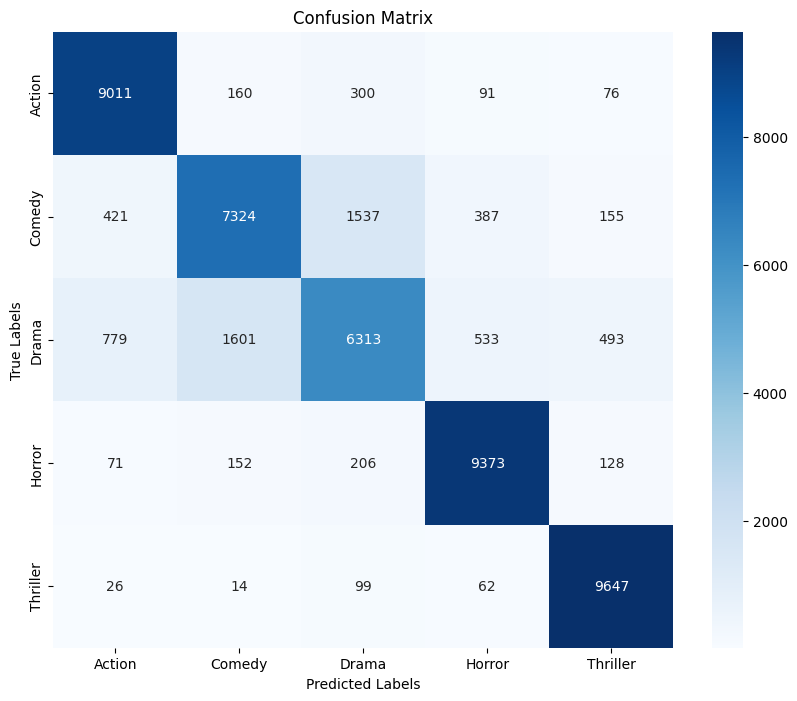

In [6]:
# Encode genre labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize text features
max_words = 10000  # Maximum number of words to tokenize
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X['title'] + " " + X['overview'])

# Convert text to sequences
X_seq = tokenizer.texts_to_sequences(X['title'] + " " + X['overview'])

# Pad sequences to ensure uniform length
max_len = 100  # Maximum length of sequences
X_padded = pad_sequences(X_seq, maxlen=max_len)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build RNN model
embedding_dim = 100  # Dimension of word embeddings
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=128))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Loss is :",loss)

# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
print(df)


                                    title  \
0                       Meg 2: The Trench   
1                     The Pope's Exorcist   
2        Transformers: Rise of the Beasts   
3       Ant-Man and the Wasp: Quantumania   
4                               Creed III   
...                                   ...   
244790                 The Wrong Daughter   
244791                   Mister Dissolute   
244792                                Red   
244793                       Beacon Point   
244794                  Family Seductions   

                                                 overview    genres  
0       An exploratory dive into the deepest depths of...    Action  
1       Father Gabriele Amorth Chief Exorcist of the V...    Horror  
2       When a new threat capable of destroying the en...    Action  
3       Super-Hero partners Scott Lang and Hope van Dy...    Action  
4       After dominating the boxing world Adonis Creed...     Drama  
...                                    